# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [3]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [4]:
preg = nsfg.ReadFemPreg()

## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [70]:
resp = nsfg.ReadFemResp()
actual_under_18_per_household = resp.numkdhh # this works!
pmf = thinkstats2.Pmf(actual_under_18_per_household, label="actual")

In [71]:
print("Mean of actual children in household under 18 is: {0}".format(ppl_under_18.mean()))

Mean of actual children in household under 18 is: 1.024205155043831


In [72]:
# now let's do the biased probability mass function (ask kids in households)
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label) # make a copy of our unbiased pmf data
    
    for x, p in pmf.Items():
        # we're not including familes of 0 in our probability distribution function
        new_pmf.Mult(x, x) # modifies the item in place
    
    new_pmf.Normalize() # normalize so sum of probabilities is 1
    return new_pmf

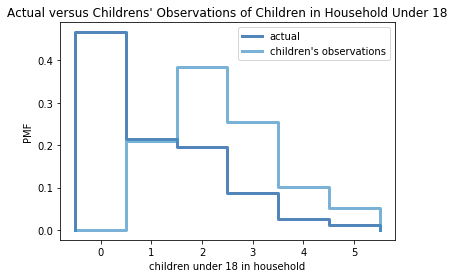

In [82]:
biased_pmf = BiasPmf(pmf, label="children's observations")
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(title="Actual versus Childrens' Observations of Children in Household Under 18", xlabel='children under 18 in household', ylabel='PMF')

Based on the graph above, we can see a much higher probability (actual data) that nearly half of households have 0 children. Childrens' observations also think there's more children per households in households past 2 children per household than the actual amount of children per household.

In [81]:
print("mean of actual data: {0} children".format(thinkstats2.Pmf(actual_under_18_per_household).Mean()))
print("mean of childrens' observations: {0} children".format(BiasPmf(pmf, label="children's observations").Mean()))

mean of actual data: 1.024205155043831 children
mean of childrens' observations: 2.403679100664282 children
